In [62]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a21e8d65-cc9c-4085-883e-2ba0ea6b492b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-02-17T13:50:39.101Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8827}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10819, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [63]:
type(data)

dict

In [89]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [65]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10819,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19630337.00000,19630337.00000,False,NaN,1,NaN,NaN,None,2024-02-17T13:50:00.000Z,51278.78447,21914882160.77142,-38.39540,-0.87039,-1.80762,8.27109,20.36922,19.49082,40.42973,1006619820047.42175,52.39470,1076854473817.53003,None,2024-02-17T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,8417,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120165121.65087,120165121.65087,True,NaN,2,NaN,NaN,None,2024-02-17T13:50:00.000Z,2750.17668,18755728048.33400,-11.05830,-1.29244,-2.97705,10.31205,9.15882,23.50367,40.71248,330475315104.62585,17.20240,330475315104.63000,None,2024-02-17T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,74751,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97598187376.17133,99600078701.92628,True,NaN,3,NaN,NaN,None,2024-02-17T13:49:00.000Z,1.00038,48486270290.63668,-24.22320,0.01003,-0.01396,-0.01637,0.15005,0.09037,-0.01062,97634938971.47737,5.08220,99637584129.88000,None,2024-02-17T13:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2066,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544475.83762,149544475.83762,False,NaN,4,NaN,NaN,None,2024-02-17T13:49:00.000Z,355.35546,1255569884.72927,-29.51510,-0.76104,-1.94162,10.46961,13.46557,40.99810,46.09885,53141445492.30389,2.76600,53141445492.30000,None,2024-02-17T13:49:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,440604585.77120,569706951.24334,True,NaN,5,NaN,NaN,None,2024-02-17T13:50:00.000Z,107.34676,1699928140.98994,-25.13190,-1.88078,-4.23750,-0.51612,8.66301,43.66503,79.04328,47297473714.52095,2.46190,61156194060.59000,None,2024-02-17T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,None,2024-02-17T13:50:00.000Z,0.54910,1062535377.05588,-40.93920,-0.94255,-3.36644,5.30363,-1.95085,-9.97300,-11.40914,29958190414.04330,1.56000,54910117274.24000,None,2024-02-17T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,16735,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28109450143.98989,28109450143.98989,False,NaN,7,NaN,NaN,None,2024-02-17T13:50:00.000Z,1.00001,4492964417.52126,-37.62280,0.02602,0.00050,0.00006,-0.00461,-0.01152,-0.00030,28109756131.09546,1.46320,28109756131.10000,None,2024-02-17T13:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35453345930.58200,36628205944.37800,False,NaN,8,NaN,NaN,None,2024-02-17T13:49:00.000Z,0.58079,437360415.78007,-41.35200,-1.11094,-3.98058,8.95546,12.78857,-1.88308,54.18534,20590831434.26912,1.07180,26135401052.31000,None,2024-02-17T13:49:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",720000000.00000,367512064.68214,435544974.68214,False,

In [66]:
# adding another column timestamp 
df= pd.json_normalize(data['data'])
df['timestamp'] =pd.to_datetime('now')
df 

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10819,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19630337.00000,19630337.00000,False,NaN,1,NaN,NaN,None,2024-02-17T13:50:00.000Z,51278.78447,21914882160.77142,-38.39540,-0.87039,-1.80762,8.27109,20.36922,19.49082,40.42973,1006619820047.42175,52.39470,1076854473817.53003,None,2024-02-17T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 14:51:18.935461
1,1027,Ethereum,ETH,ethereum,8417,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120165121.65087,120165121.65087,True,NaN,2,NaN,NaN,None,2024-02-17T13:50:00.000Z,2750.17668,18755728048.33400,-11.05830,-1.29244,-2.97705,10.31205,9.15882,23.50367,40.71248,330475315104.62585,17.20240,330475315104.63000,None,2024-02-17T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 14:51:18.935461
2,825,Tether USDt,USDT,tether,74751,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97598187376.17133,99600078701.92628,True,NaN,3,NaN,NaN,None,2024-02-17T13:49:00.000Z,1.00038,48486270290.63668,-24.22320,0.01003,-0.01396,-0.01637,0.15005,0.09037,-0.01062,97634938971.47737,5.08220,99637584129.88000,None,2024-02-17T13:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-17 14:51:18.935461
3,1839,BNB,BNB,bnb,2066,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544475.83762,149544475.83762,False,NaN,4,NaN,NaN,None,2024-02-17T13:49:00.000Z,355.35546,1255569884.72927,-29.51510,-0.76104,-1.94162,10.46961,13.46557,40.99810,46.09885,53141445492.30389,2.76600,53141445492.30000,None,2024-02-17T13:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 14:51:18.935461
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,440604585.77120,569706951.24334,True,NaN,5,NaN,NaN,None,2024-02-17T13:50:00.000Z,107.34676,1699928140.98994,-25.13190,-1.88078,-4.23750,-0.51612,8.66301,43.66503,79.04328,47297473714.52095,2.46190,61156194060.59000,None,2024-02-17T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 14:51:18.935461
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,None,2024-02-17T13:50:00.000Z,0.54910,1062535377.05588,-40.93920,-0.94255,-3.36644,5.30363,-1.95085,-9.97300,-11.40914,29958190414.04330,1.56000,54910117274.24000,None,2024-02-17T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 14:51:18.935461
6,3408,USDC,USDC,usd-coin,16735,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28109450143.98989,28109450143.98989,False,NaN,7,NaN,NaN,None,2024-02-17T13:50:00.000Z,1.00001,4492964417.52126,-37.62280,0.02602,0.00050,0.00006,-0.00461,-0.01152,-0.00030,28109756131.09546,1.46320,28109756131.10000,None,2024-02-17T13:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-17 14:51:18.935461
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35453345930.58200,36628205944.37800,False,NaN,8,NaN,NaN,None,2024-02-17T13:49:00.000Z,0.58079,437360415.78007,-41.35200,-1.11094,-3.98058,8.95546,12.78857,-1.88308,54.18534,20590831434.26912,1.07180,26135401052.31000,None,2024-02-17T13

In [77]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
    }
    headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a21e8d65-cc9c-4085-883e-2ba0ea6b492b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
      #df1= pd.json_normalize(data['data'])
    #df2 ['timestamp'] =pd.to_datetime('now')
    #df= df2._append(df2)
    df = pd.json_normalize(data['data'])
    df ['timestamp'] =pd.to_datetime('now')
    df
    if not os.path.isfile(r'C:\Users\SURFACE\OneDrive\python script\API2.csv'):
        df.to_csv(r'C:\Users\SURFACE\OneDrive\python script\API2.csv',header ='column_names')
    else:
        df.to_csv(r'C:\Users\SURFACE\OneDrive\python script\API2.csv', mode ='a',header = False)
        

In [78]:
import os 
from time import time 
from time import sleep 

for i in range(100):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1minute
exit()

{'status': {'timestamp': '2024-02-17T14:01:38.257Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8827}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10819, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [93]:
df3 = pd.read_csv(r'C:\Users\SURFACE\OneDrive\python script\API2.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10819,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19630337.00000,19630337.00000,False,NaN,1,NaN,NaN,NaN,2024-02-17T14:00:00.000Z,51201.99611,21964239081.60008,-37.08320,-1.01281,-2.44614,8.18059,20.53837,19.47352,40.26681,1005112438754.55115,52.37530,1075241918355.53003,NaN,2024-02-17T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:01:36.828473
1,1,1027,Ethereum,ETH,ethereum,8417,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120165121.65087,120165121.65087,True,NaN,2,NaN,NaN,NaN,2024-02-17T14:00:00.000Z,2745.11718,18930517809.81241,-9.87250,-1.39881,-3.38045,10.18026,9.22246,23.38847,40.49153,329867340194.94885,17.19560,329867340194.95001,NaN,2024-02-17T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:01:36.828473
2,2,825,Tether USDt,USDT,tether,74751,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,97598187376.17133,99600078701.92628,True,NaN,3,NaN,NaN,NaN,2024-02-17T13:59:00.000Z,1.00025,48743904745.28064,-23.66880,-0.00043,0.01455,-0.01717,0.09234,0.05601,-0.01788,97622591454.56792,5.08900,99624983346.10001,NaN,2024-02-17T13:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-17 15:01:36.828473
3,3,1839,BNB,BNB,bnb,2066,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149544475.83762,149544475.83762,False,NaN,4,NaN,NaN,NaN,2024-02-17T13:59:00.000Z,354.31599,1248717501.49822,-29.80810,-1.23856,-2.42926,10.10489,13.10686,40.54723,45.70336,52985999221.31277,2.76100,52985999221.31000,NaN,2024-02-17T13:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:01:36.828473
4,4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,440604585.77120,569706951.24334,True,NaN,5,NaN,NaN,NaN,2024-02-17T14:00:00.000Z,106.90445,1702579144.49174,-24.92940,-2.09713,-4.68014,-1.02594,8.13650,42.93184,78.64082,47102592919.41264,2.45700,60904210882.88000,NaN,2024-02-17T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:01:36.828473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,74,Dogecoin,DOGE,dogecoin,889,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,143109546383.70523,143109546383.70523,True,NaN,11,NaN,NaN,NaN,2024-02-17T14:06:00.000Z,0.08334,382188801.14562,-23.70900,-1.52216,-4.06718,2.80752,4.43693,-8.94621,6.18955,11926983574.10600,0.62190,11926983574.11000,NaN,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
86,11,1975,Chainlink,LINK,chainlink,1643,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1000000000.00000,587099970.45279,1000000000.00000,False,NaN,12,NaN,NaN,NaN,2024-02-17T14:05:00.000Z,19.61079,422970538.21664,-15.06940,-0.67783,-1.75160,6.62972,28.72405,35.80034,38.88747,11513493837.40530,0.60040,19610789332.05000,NaN,2024-02-17T14:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-02-17 15:06:48.550101
87,12,6636,Polkadot,DOT,polkadot-new,684,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1299929871.51130,1412063581.77600,True,NaN,13,NaN,NaN,NaN,2

In [92]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10819,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19630337.00000,19630337.00000,False,NaN,1,NaN,NaN,None,2024-02-17T14:06:00.000Z,51289.46277,21612492470.35575,-39.38700,-0.69247,-1.88222,8.40250,20.83703,19.84731,40.60948,1006829438688.71313,52.44600,1077078718132.18994,None,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
1,1027,Ethereum,ETH,ethereum,8417,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120165121.65087,120165121.65087,True,NaN,2,NaN,NaN,None,2024-02-17T14:06:00.000Z,2750.07259,18797705889.13424,-10.40040,-1.06068,-2.73596,10.40498,9.38957,23.83621,40.88799,330462807829.25873,17.20790,330462807829.26001,None,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
2,825,Tether USDt,USDT,tether,74751,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97598187376.17133,99600078701.92628,True,NaN,3,NaN,NaN,None,2024-02-17T14:05:00.000Z,1.00033,48364834436.44482,-24.26030,0.00770,-0.03701,-0.02084,0.12827,0.06774,-0.02978,97630868902.91776,5.09100,99633430577.85001,None,2024-02-17T14:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-17 15:06:48.550101
3,1839,BNB,BNB,bnb,2066,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544475.83762,149544475.83762,False,NaN,4,NaN,NaN,None,2024-02-17T14:05:00.000Z,354.54309,1236609061.51017,-29.80100,-1.28698,-2.56266,10.17822,13.41629,40.59671,45.87337,53019960709.79162,2.76180,53019960709.79000,None,2024-02-17T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,440604585.77120,569706951.24334,True,NaN,5,NaN,NaN,None,2024-02-17T14:06:00.000Z,106.99753,1676523781.09093,-25.18110,-1.57388,-4.40693,-1.06734,8.47435,43.06945,79.30811,47143602929.27301,2.45600,60957237311.66000,None,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,None,2024-02-17T14:06:00.000Z,0.54832,1058663738.19201,-41.13960,-1.09058,-3.61493,5.07875,-2.35340,-10.11697,-11.35239,29915796815.96954,1.55850,54832414402.02000,None,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
6,3408,USDC,USDC,usd-coin,16735,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28109450143.98989,28109450143.98989,False,NaN,7,NaN,NaN,None,2024-02-17T14:06:00.000Z,1.00001,4464099228.13105,-38.11220,0.01223,-0.00238,-0.00604,-0.00683,-0.01859,-0.00814,28109826559.92207,1.46580,28109826559.92000,None,2024-02-17T14:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-17 15:06:48.550101
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35453345930.58200,36628205944.37800,False,NaN,8,NaN,NaN,None,2024-02-17T14:05:00.000Z,0.57960,432912378.14170,-41.06750,-1.44450,-4.22718,8.58573,12.56947,-1.88596,54.02208,20548800778.68122,1.07150,26082052646.07000,None,2024-02-17

In [83]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [94]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10819,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19630337.00000,19630337.00000,False,NaN,1,NaN,NaN,None,2024-02-17T14:06:00.000Z,51289.46277,21612492470.35575,-39.38700,-0.69247,-1.88222,8.40250,20.83703,19.84731,40.60948,1006829438688.71313,52.44600,1077078718132.18994,None,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
1,1027,Ethereum,ETH,ethereum,8417,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120165121.65087,120165121.65087,True,NaN,2,NaN,NaN,None,2024-02-17T14:06:00.000Z,2750.07259,18797705889.13424,-10.40040,-1.06068,-2.73596,10.40498,9.38957,23.83621,40.88799,330462807829.25873,17.20790,330462807829.26001,None,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
2,825,Tether USDt,USDT,tether,74751,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97598187376.17133,99600078701.92628,True,NaN,3,NaN,NaN,None,2024-02-17T14:05:00.000Z,1.00033,48364834436.44482,-24.26030,0.00770,-0.03701,-0.02084,0.12827,0.06774,-0.02978,97630868902.91776,5.09100,99633430577.85001,None,2024-02-17T14:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-17 15:06:48.550101
3,1839,BNB,BNB,bnb,2066,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544475.83762,149544475.83762,False,NaN,4,NaN,NaN,None,2024-02-17T14:05:00.000Z,354.54309,1236609061.51017,-29.80100,-1.28698,-2.56266,10.17822,13.41629,40.59671,45.87337,53019960709.79162,2.76180,53019960709.79000,None,2024-02-17T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,440604585.77120,569706951.24334,True,NaN,5,NaN,NaN,None,2024-02-17T14:06:00.000Z,106.99753,1676523781.09093,-25.18110,-1.57388,-4.40693,-1.06734,8.47435,43.06945,79.30811,47143602929.27301,2.45600,60957237311.66000,None,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,None,2024-02-17T14:06:00.000Z,0.54832,1058663738.19201,-41.13960,-1.09058,-3.61493,5.07875,-2.35340,-10.11697,-11.35239,29915796815.96954,1.55850,54832414402.02000,None,2024-02-17T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-17 15:06:48.550101
6,3408,USDC,USDC,usd-coin,16735,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28109450143.98989,28109450143.98989,False,NaN,7,NaN,NaN,None,2024-02-17T14:06:00.000Z,1.00001,4464099228.13105,-38.11220,0.01223,-0.00238,-0.00604,-0.00683,-0.01859,-0.00814,28109826559.92207,1.46580,28109826559.92000,None,2024-02-17T14:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-17 15:06:48.550101
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35453345930.58200,36628205944.37800,False,NaN,8,NaN,NaN,None,2024-02-17T14:05:00.000Z,0.57960,432912378.14170,-41.06750,-1.44450,-4.22718,8.58573,12.56947,-1.88596,54.02208,20548800778.68122,1.07150,26082052646.07000,None,2024-02-17

In [95]:
df4 = df.groupby('name',sort = False)[[ 'quote.USD.percent_change_1h',	'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d','quote.USD.percent_change_60d'	,'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.69247,-1.88222,8.40250,20.83703,19.84731,40.60948
Ethereum,-1.06068,-2.73596,10.40498,9.38957,23.83621,40.88799
Tether USDt,0.00770,-0.03701,-0.02084,0.12827,0.06774,-0.02978
BNB,-1.28698,-2.56266,10.17822,13.41629,40.59671,45.87337
Solana,-1.57388,-4.40693,-1.06734,8.47435,43.06945,79.30811
XRP,-1.09058,-3.61493,5.07875,-2.35340,-10.11697,-11.35239
USDC,0.01223,-0.00238,-0.00604,-0.00683,-0.01859,-0.00814
Cardano,-1.44450,-4.22718,8.58573,12.56947,-1.88596,54.02208
Avalanche,-1.70799,-4.59101,0.84179,11.51082,-4.18589,82.61802


In [97]:
df5 = df4.stack()
df5
pd.set_option('display.max_columns',None)

In [98]:
df6 =df5.to_frame(name='values')
df6
pd.set_option('display.max_columns',None)

In [99]:
index =pd.Index(range(90))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.69247
1,Bitcoin,quote.USD.percent_change_24h,-1.88222
2,Bitcoin,quote.USD.percent_change_7d,8.40250
3,Bitcoin,quote.USD.percent_change_30d,20.83703
4,Bitcoin,quote.USD.percent_change_60d,19.84731
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-0.44672
86,Toncoin,quote.USD.percent_change_7d,5.70377
87,Toncoin,quote.USD.percent_change_30d,-2.28855
88,Toncoin,quote.USD.percent_change_60d,1.40621


In [100]:
df8 = df7.rename(columns={'level_1':'Percent_change'})
df8

,name,Percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.69247
1,Bitcoin,quote.USD.percent_change_24h,-1.88222
2,Bitcoin,quote.USD.percent_change_7d,8.40250
3,Bitcoin,quote.USD.percent_change_30d,20.83703
4,Bitcoin,quote.USD.percent_change_60d,19.84731
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-0.44672
86,Toncoin,quote.USD.percent_change_7d,5.70377
87,Toncoin,quote.USD.percent_change_30d,-2.28855
88,Toncoin,quote.USD.percent_change_60d,1.40621


In [101]:
df8['Percent_change'] = df8['Percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24hr','7dy','30dy','60dy','90dy'])
df8

,name,Percent_change,values
0,Bitcoin,1hr,-0.69247
1,Bitcoin,24hr,-1.88222
2,Bitcoin,7dy,8.40250
3,Bitcoin,30dy,20.83703
4,Bitcoin,60dy,19.84731
...,...,...,...
85,Toncoin,24hr,-0.44672
86,Toncoin,7dy,5.70377
87,Toncoin,30dy,-2.28855
88,Toncoin,60dy,1.40621


In [102]:
import seaborn as sns 
import matplotlib.pyplot as plt

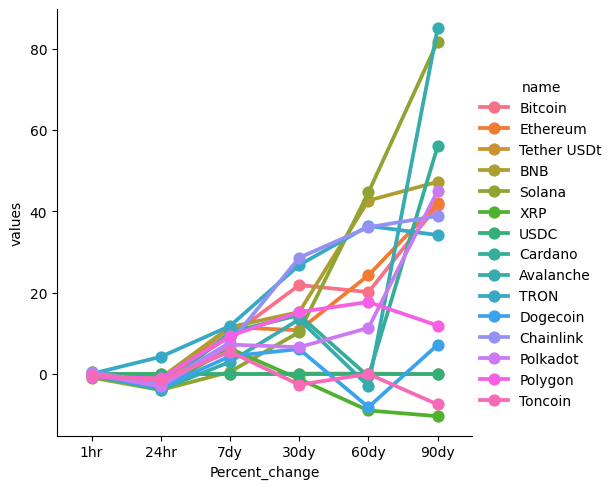

In [52]:
sns.catplot(x = 'Percent_change',y='values',hue ='name',data = df8,kind ='point');

In [105]:
df10= df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name=='Bitcoin'")
df10


,name,quote.USD.price,timestamp
0,Bitcoin,51289.46277,2024-02-17 15:06:48.550101


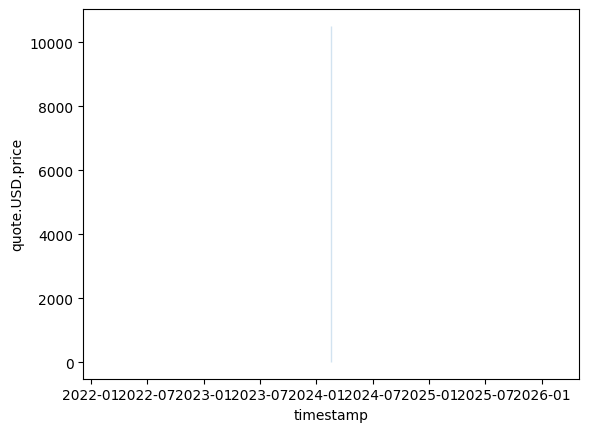

In [106]:
sns.lineplot(x='timestamp',y='quote.USD.price',data =df);